# **Unicorn: Analysis in SQL**

## **Annex 1: Sales and Profit Analysis**



**1. Total number of customers:**

```
SELECT
   COUNT(DISTINCT customer_id) AS total_customers
 FROM customers;

```

*   Result: 795 customers.


**2. City with the most profit in 2015:**



```
SELECT
   o.shipping_city AS city,
   SUM(od.order_profits) AS profit
 FROM order_details od
 JOIN orders o
   ON od.order_id = o.order_id
 WHERE EXTRACT(YEAR FROM o.order_date) = 2015
 GROUP BY city
 ORDER BY profit DESC
 LIMIT 1;

```
* Result: New York City, with a profit of 14,753.


**3. Number of different cities:**



```
 SELECT
   COUNT(DISTINCT shipping_city) AS unique_cities
 FROM orders;

```
* Result: 531 cities.


**4. Most profitable city in Tennessee:**



```
 SELECT
   o.shipping_city AS city,
   SUM(od.order_profits) AS profit
 FROM order_details od
 JOIN orders o
   ON od.order_id = o.order_id
 WHERE o.shipping_state = 'Tennessee'
 GROUP BY city
 ORDER BY profit DESC
 LIMIT 1;
```
* Result: Lebanon, with a profit of 83.

**5. Average annual profit for Lebanon:**


```
 WITH Lebanon_annual_profit AS(
  SELECT
     EXTRACT(YEAR FROM o.order_date) AS years,
     SUM(od.order_profits) AS annual_profit
  FROM order_details od
  JOIN orders o
     ON od.order_id = o.order_id
  WHERE o.shipping_city = 'Lebanon'
  GROUP BY years)


 SELECT
   ROUND(AVG(annual_profit)::numeric,2) AS average_annual_profit
 FROM Lebanon_annual_profit;

```
* Result: 27.67 average annual profit.

**6. Biggest order regarding sales in 2015:**



```
 SELECT
   od.order_id,
   od.order_sales AS biggest_order
 FROM order_details od
 JOIN orders o
   ON od.order_id = o.order_id
 WHERE EXTRACT(YEAR FROM o.order_date) = 2015
 ORDER BY biggest_order DESC
 LIMIT 1;

```
 * Result: Order CA-2015-145317.


**7. Monthly profit variation in 2018:**


```
 WITH month_profit AS (
  SELECT
    to_char(order_date, 'MM-YYYY') AS month,
    SUM(order_profits) AS monthly_profit
 FROM order_details od
 JOIN orders o ON od.order_id = o.order_id
 WHERE EXTRACT(YEAR FROM o.order_date) = 2018
 GROUP BY month
 ORDER BY month)


 SELECT *,
(monthly_profit - LAG(monthly_profit) OVER())
   AS month_profit_difference
 FROM month_profit
 ;

```



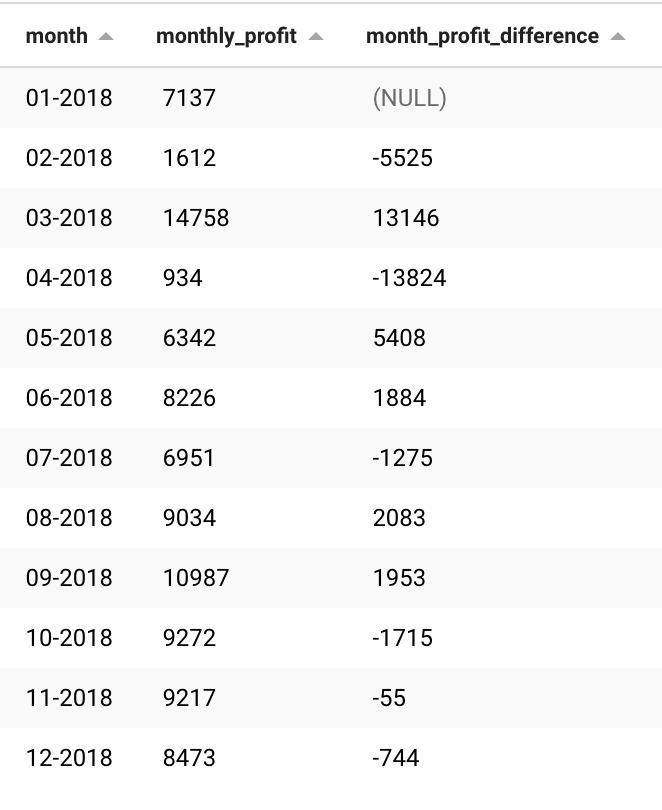

## **Annex 2: Customer Behavior**

**1. Total spent by customers:**



```
 SELECT
   c.customer_id,
   c.customer_name,
   SUM(od.order_sales) AS total_spent
 FROM customers AS c
 JOIN orders AS o
   ON c.customer_id = o.customer_id
 JOIN order_details AS od
   ON o.order_id = od.order_id
 GROUP BY c.customer_id
 ORDER BY total_spent ASC;

```

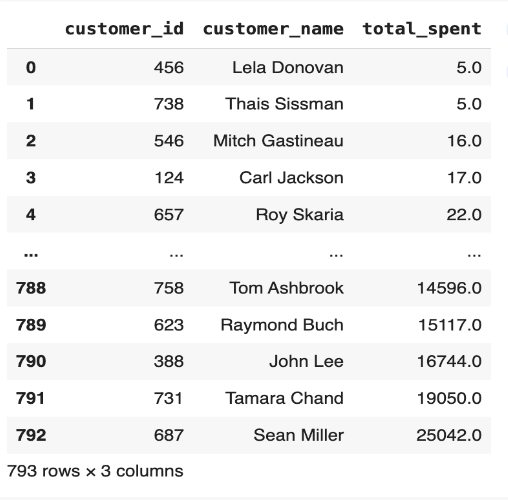

**2. Customer with the highest discount:**



```
SELECT
 c.customer_id,
 SUM((order_sales / (1 - order_discount)) - order_sales) AS total_discount
 FROM
 order_details od
 JOIN orders o ON o.order_id = od.order_id
 JOIN customers c ON o.customer_id = c.customer_id
 GROUP BY c.customer_id
 ORDER BY total_discount DESC;

```

* Result: Customer ID 687.

**3. Customer distribution by type:**



```
 SELECT
  customer_segment,
  COUNT(*) AS dist_customer
 FROM customers
 GROUP BY customer_segment
 ORDER BY dist_customer;

```


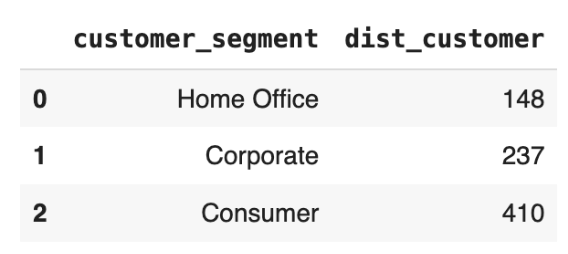

**4. Customer names in ‘Consumer’ or ‘Corporate’ segments:**



```
 SELECT
   DISTINCT customer_name,
   customer_segment,
   (SELECT COUNT(*)
    FROM customers
    WHERE customer_segment IN ('Consumer', 'Corporate')) AS total_number
 FROM customers
 WHERE customer_segment IN ('Consumer', 'Corporate')
 ORDER BY customer_name ASC;

```



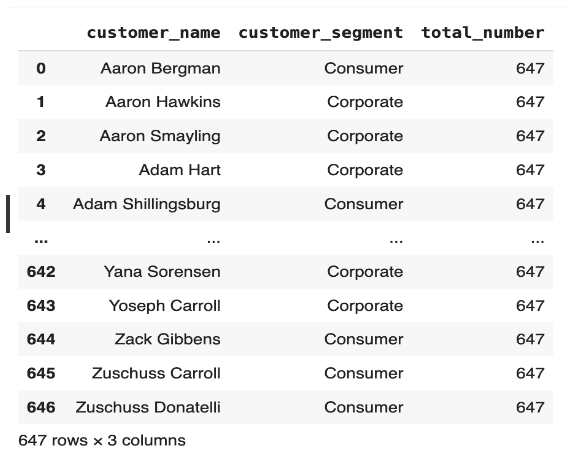

# **Annex 3: Product Performance**

**1. Most profitable product category in Iowa:**



```
SELECT
   pr.product_category,
   ROUND(AVG(od.order_profits)::numeric,2) AS average_profit
 FROM product pr
 JOIN order_details od
   ON od.product_id = pr.product_id
 JOIN orders o
   ON o.order_id = od.order_id
 WHERE o.shipping_state = 'Iowa'
 GROUP BY pr.product_category
 ORDER BY average_profit DESC
 LIMIT 1;

```
* Result: Furniture, with an average profit of 130.25.


**2. Most popular product in the Furniture category in 2016:**



```
 SELECT
   pr.product_name,
   SUM(of.quantity) AS total_products
 FROM product ex
 JOIN order_details from
   ON of.product_id = pr.product_id
 JOIN orders o
   ON o.order_id = from.order_id
 WHERE pr.product_category = 'Furniture'
       AND EXTRACT(YEAR FROM o.order_date) = 2016
 GROUP BY pr.product_name
 ORDER BY total_products DESC
 LIMIT 1;

```
* Result: Global Push Button Manager's Chair, Indigo.


**3. Difference between largest and smallest order quantities for product ID ‘100’:**



```
 SELECT
   MAX(quantity) - MIN(quantity) AS quantity_diff
 FROM order_details
 WHERE product_id = 100;

```
* Result: 4.


**4. Percentage of products in the Furniture category:**

```
 SELECT
   ROUND(((SELECT COUNT(*)FROM product
   WHERE product_category = 'Furniture')*1.0)/COUNT(*) *100, 2)   
AS perc_furniture
 FROM product;

```
* Result: 20.54%.

**5. Number of manufacturers with more than one product:**
```
WITH product_manufacturers AS (
   SELECT
      product_manufacturer,
      COUNT(DISTINCT product_id) AS total_products_per_manufacturer
   FROM product
   GROUP BY product_manufacturer
 )
 SELECT
   COUNT(product_manufacturer) AS total_manufacturers
 FROM product_manufacturers
 WHERE total_products_per_manufacturer > 1
 ;

```
* Result: 169 manufacturers.

**6. Product subcategory and total number of products:**
```
 SELECT
   product_subcategory,
   COUNT(DISTINCT product_id) AS num_products
 FROM product
 GROUP BY product_subcategory
 ORDER BY num_products DESC,
    product_subcategory ASC
 ;

```

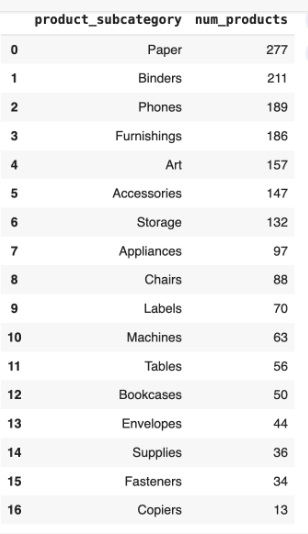

**7. Product IDs with quantities greater than or equal to 100:**
```
 SELECT
   product_id,
   SUM(quantity) AS total_quantity
 FROM order_details
 GROUP BY product_id
 HAVING SUM(quantity) >= 100
;
```


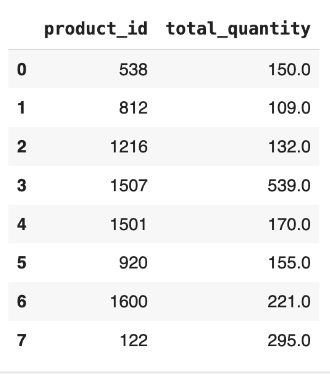